In [264]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

In [265]:
df=pd.read_csv('powerplant.csv')
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [266]:
df.shape

(907, 27)

In [267]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [268]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [270]:
df.isnull()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,True,True,...,False,True,False,False,False,False,False,True,False,True
4,False,False,False,False,False,False,False,False,False,True,...,False,True,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,False,False,False,False,False,False,False,False,False,True,...,False,True,True,False,False,False,False,True,False,True
903,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True
904,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True
905,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True


In [271]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [272]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
le=LabelEncoder()
list1=['country','country_long','name','gppd_idnr','primary_fuel','other_fuel1','other_fuel2','source','owner','url','geolocation_source','generation_data_source']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))


In [273]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,0,0,0,657,2.5,28.1839,73.2407,6,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
1,0,0,1,519,98.0,24.7663,74.6090,1,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
2,0,0,2,853,39.2,21.9038,69.3732,7,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
3,0,0,3,0,135.0,23.8712,91.3602,2,3,1,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,0,NaN
4,0,0,4,1,1800.0,21.9603,82.4091,1,2,1,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,0,0,902,491,1600.0,16.2949,77.3568,1,2,1,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,0,NaN
903,0,0,903,822,3.0,12.8932,78.1654,6,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
904,0,0,904,891,25.5,15.2758,75.5811,7,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
905,0,0,905,539,80.0,24.3500,73.7477,1,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [274]:
df['latitude']=df['latitude'].fillna((df['latitude']).mean())
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,0,0,0,657,2.5,28.1839,73.2407,6,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
1,0,0,1,519,98.0,24.7663,74.6090,1,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
2,0,0,2,853,39.2,21.9038,69.3732,7,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
3,0,0,3,0,135.0,23.8712,91.3602,2,3,1,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,0,NaN
4,0,0,4,1,1800.0,21.9603,82.4091,1,2,1,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,0,NaN


In [275]:
df['longitude']=df['longitude'].fillna((df['longitude']).mean())
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,0,0,0,657,2.5,28.1839,73.2407,6,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
1,0,0,1,519,98.0,24.7663,74.6090,1,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
2,0,0,2,853,39.2,21.9038,69.3732,7,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
3,0,0,3,0,135.0,23.8712,91.3602,2,3,1,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,0,NaN
4,0,0,4,1,1800.0,21.9603,82.4091,1,2,1,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,0,NaN


In [276]:
df.drop(['generation_gwh_2013'],axis=1,inplace=True)
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,wepp_id,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,0,0,0,657,2.5,28.1839,73.2407,6,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
1,0,0,1,519,98.0,24.7663,74.6090,1,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
2,0,0,2,853,39.2,21.9038,69.3732,7,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
3,0,0,3,0,135.0,23.8712,91.3602,2,3,1,...,NaN,2019.0,617.789264,843.747,886.004428,663.774500,626.239128,NaN,0,NaN
4,0,0,4,1,1800.0,21.9603,82.4091,1,2,1,...,NaN,2019.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,0,NaN


In [277]:
df.drop(['generation_gwh_2014'],axis=1,inplace=True)
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,0,0,0,657,2.5,28.1839,73.2407,6,3,1,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
1,0,0,1,519,98.0,24.7663,74.6090,1,3,1,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
2,0,0,2,853,39.2,21.9038,69.3732,7,3,1,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
3,0,0,3,0,135.0,23.8712,91.3602,2,3,1,...,2,NaN,2019.0,843.747,886.004428,663.774500,626.239128,NaN,0,NaN
4,0,0,4,1,1800.0,21.9603,82.4091,1,2,1,...,2,NaN,2019.0,5916.370,6243.000000,5385.579736,7279.000000,NaN,0,NaN


In [278]:
df.drop(['generation_gwh_2015'],axis=1,inplace=True)
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,0,0,0,657,2.5,28.1839,73.2407,6,3,1,...,128,1,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
1,0,0,1,519,98.0,24.7663,74.6090,1,3,1,...,173,2,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
2,0,0,2,853,39.2,21.9038,69.3732,7,3,1,...,205,2,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
3,0,0,3,0,135.0,23.8712,91.3602,2,3,1,...,58,2,NaN,2019.0,886.004428,663.774500,626.239128,NaN,0,NaN
4,0,0,4,1,1800.0,21.9603,82.4091,1,2,1,...,58,2,NaN,2019.0,6243.000000,5385.579736,7279.000000,NaN,0,NaN


In [279]:
df.drop(['generation_gwh_2016'],axis=1,inplace=True)
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,0,0,0,657,2.5,28.1839,73.2407,6,3,1,...,109,128,1,NaN,NaN,NaN,NaN,NaN,1,NaN
1,0,0,1,519,98.0,24.7663,74.6090,1,3,1,...,174,173,2,NaN,NaN,NaN,NaN,NaN,1,NaN
2,0,0,2,853,39.2,21.9038,69.3732,7,3,1,...,21,205,2,NaN,NaN,NaN,NaN,NaN,1,NaN
3,0,0,3,0,135.0,23.8712,91.3602,2,3,1,...,22,58,2,NaN,2019.0,663.774500,626.239128,NaN,0,NaN
4,0,0,4,1,1800.0,21.9603,82.4091,1,2,1,...,22,58,2,NaN,2019.0,5385.579736,7279.000000,NaN,0,NaN


In [280]:
df.drop(['generation_gwh_2017'],axis=1,inplace=True)
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,0,0,0,657,2.5,28.1839,73.2407,6,3,1,...,229,109,128,1,NaN,NaN,NaN,NaN,1,NaN
1,0,0,1,519,98.0,24.7663,74.6090,1,3,1,...,258,174,173,2,NaN,NaN,NaN,NaN,1,NaN
2,0,0,2,853,39.2,21.9038,69.3732,7,3,1,...,2,21,205,2,NaN,NaN,NaN,NaN,1,NaN
3,0,0,3,0,135.0,23.8712,91.3602,2,3,1,...,280,22,58,2,NaN,2019.0,626.239128,NaN,0,NaN
4,0,0,4,1,1800.0,21.9603,82.4091,1,2,1,...,280,22,58,2,NaN,2019.0,7279.000000,NaN,0,NaN


In [281]:
df.drop(['generation_gwh_2018'],axis=1,inplace=True)
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,0,0,0,657,2.5,28.1839,73.2407,6,3,1,...,2011.0,229,109,128,1,NaN,NaN,NaN,1,NaN
1,0,0,1,519,98.0,24.7663,74.6090,1,3,1,...,NaN,258,174,173,2,NaN,NaN,NaN,1,NaN
2,0,0,2,853,39.2,21.9038,69.3732,7,3,1,...,NaN,2,21,205,2,NaN,NaN,NaN,1,NaN
3,0,0,3,0,135.0,23.8712,91.3602,2,3,1,...,2004.0,280,22,58,2,NaN,2019.0,NaN,0,NaN
4,0,0,4,1,1800.0,21.9603,82.4091,1,2,1,...,2015.0,280,22,58,2,NaN,2019.0,NaN,0,NaN


In [282]:
df.drop(['generation_gwh_2019'],axis=1,inplace=True)
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_data_source,estimated_generation_gwh
0,0,0,0,657,2.5,28.1839,73.2407,6,3,1,NaN,2011.0,229,109,128,1,NaN,NaN,1,NaN
1,0,0,1,519,98.0,24.7663,74.6090,1,3,1,NaN,NaN,258,174,173,2,NaN,NaN,1,NaN
2,0,0,2,853,39.2,21.9038,69.3732,7,3,1,NaN,NaN,2,21,205,2,NaN,NaN,1,NaN
3,0,0,3,0,135.0,23.8712,91.3602,2,3,1,NaN,2004.0,280,22,58,2,NaN,2019.0,0,NaN
4,0,0,4,1,1800.0,21.9603,82.4091,1,2,1,NaN,2015.0,280,22,58,2,NaN,2019.0,0,NaN


In [283]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                   0
other_fuel2                   0
other_fuel3                 907
commissioning_year          380
owner                         0
source                        0
url                           0
geolocation_source            0
wepp_id                     907
year_of_capacity_data       388
generation_data_source        0
estimated_generation_gwh    907
dtype: int64

In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    int32  
 1   country_long              907 non-null    int32  
 2   name                      907 non-null    int32  
 3   gppd_idnr                 907 non-null    int32  
 4   capacity_mw               907 non-null    float64
 5   latitude                  907 non-null    float64
 6   longitude                 907 non-null    float64
 7   primary_fuel              907 non-null    int32  
 8   other_fuel1               907 non-null    int32  
 9   other_fuel2               907 non-null    int32  
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     907 non-null    int32  
 13  source                    907 non-null    int32  
 14  url       

In [285]:
df.drop(['other_fuel3'],axis=1,inplace=True)
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_data_source,estimated_generation_gwh
0,0,0,0,657,2.5,28.1839,73.2407,6,3,1,2011.0,229,109,128,1,NaN,NaN,1,NaN
1,0,0,1,519,98.0,24.7663,74.6090,1,3,1,NaN,258,174,173,2,NaN,NaN,1,NaN
2,0,0,2,853,39.2,21.9038,69.3732,7,3,1,NaN,2,21,205,2,NaN,NaN,1,NaN
3,0,0,3,0,135.0,23.8712,91.3602,2,3,1,2004.0,280,22,58,2,NaN,2019.0,0,NaN
4,0,0,4,1,1800.0,21.9603,82.4091,1,2,1,2015.0,280,22,58,2,NaN,2019.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,0,0,902,491,1600.0,16.2949,77.3568,1,2,1,2016.0,280,22,58,2,NaN,2019.0,0,NaN
903,0,0,903,822,3.0,12.8932,78.1654,6,3,1,NaN,114,77,22,0,NaN,NaN,1,NaN
904,0,0,904,891,25.5,15.2758,75.5811,7,3,1,NaN,280,21,260,2,NaN,NaN,1,NaN
905,0,0,905,539,80.0,24.3500,73.7477,1,3,1,NaN,91,59,82,2,NaN,NaN,1,NaN


In [286]:
df.drop(['wepp_id'],axis=1,inplace=True)
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_data_source,estimated_generation_gwh
0,0,0,0,657,2.5,28.1839,73.2407,6,3,1,2011.0,229,109,128,1,NaN,1,NaN
1,0,0,1,519,98.0,24.7663,74.6090,1,3,1,NaN,258,174,173,2,NaN,1,NaN
2,0,0,2,853,39.2,21.9038,69.3732,7,3,1,NaN,2,21,205,2,NaN,1,NaN
3,0,0,3,0,135.0,23.8712,91.3602,2,3,1,2004.0,280,22,58,2,2019.0,0,NaN
4,0,0,4,1,1800.0,21.9603,82.4091,1,2,1,2015.0,280,22,58,2,2019.0,0,NaN


In [287]:
df.drop(['estimated_generation_gwh'],axis=1,inplace=True)
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_data_source
0,0,0,0,657,2.5,28.1839,73.2407,6,3,1,2011.0,229,109,128,1,NaN,1
1,0,0,1,519,98.0,24.7663,74.6090,1,3,1,NaN,258,174,173,2,NaN,1
2,0,0,2,853,39.2,21.9038,69.3732,7,3,1,NaN,2,21,205,2,NaN,1
3,0,0,3,0,135.0,23.8712,91.3602,2,3,1,2004.0,280,22,58,2,2019.0,0
4,0,0,4,1,1800.0,21.9603,82.4091,1,2,1,2015.0,280,22,58,2,2019.0,0


In [288]:
df['commissioning_year']=df['commissioning_year'].fillna((df['commissioning_year']).mean())
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_data_source
0,0,0,0,657,2.5,28.1839,73.2407,6,3,1,2011.000000,229,109,128,1,NaN,1
1,0,0,1,519,98.0,24.7663,74.6090,1,3,1,1997.091082,258,174,173,2,NaN,1
2,0,0,2,853,39.2,21.9038,69.3732,7,3,1,1997.091082,2,21,205,2,NaN,1
3,0,0,3,0,135.0,23.8712,91.3602,2,3,1,2004.000000,280,22,58,2,2019.0,0
4,0,0,4,1,1800.0,21.9603,82.4091,1,2,1,2015.000000,280,22,58,2,2019.0,0


In [289]:
df['year_of_capacity_data']=df['year_of_capacity_data'].fillna((df['year_of_capacity_data']).mean())
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_data_source
0,0,0,0,657,2.5,28.1839,73.2407,6,3,1,2011.000000,229,109,128,1,2019.0,1
1,0,0,1,519,98.0,24.7663,74.6090,1,3,1,1997.091082,258,174,173,2,2019.0,1
2,0,0,2,853,39.2,21.9038,69.3732,7,3,1,1997.091082,2,21,205,2,2019.0,1
3,0,0,3,0,135.0,23.8712,91.3602,2,3,1,2004.000000,280,22,58,2,2019.0,0
4,0,0,4,1,1800.0,21.9603,82.4091,1,2,1,2015.000000,280,22,58,2,2019.0,0


In [290]:
df.drop(['country'],axis=1,inplace=True)
df.head()

,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_data_source
0,0,0,657,2.5,28.1839,73.2407,6,3,1,2011.000000,229,109,128,1,2019.0,1
1,0,1,519,98.0,24.7663,74.6090,1,3,1,1997.091082,258,174,173,2,2019.0,1
2,0,2,853,39.2,21.9038,69.3732,7,3,1,1997.091082,2,21,205,2,2019.0,1
3,0,3,0,135.0,23.8712,91.3602,2,3,1,2004.000000,280,22,58,2,2019.0,0
4,0,4,1,1800.0,21.9603,82.4091,1,2,1,2015.000000,280,22,58,2,2019.0,0


In [291]:
df.drop(['country_long'],axis=1,inplace=True)
df.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_data_source
0,0,657,2.5,28.1839,73.2407,6,3,1,2011.000000,229,109,128,1,2019.0,1
1,1,519,98.0,24.7663,74.6090,1,3,1,1997.091082,258,174,173,2,2019.0,1
2,2,853,39.2,21.9038,69.3732,7,3,1,1997.091082,2,21,205,2,2019.0,1
3,3,0,135.0,23.8712,91.3602,2,3,1,2004.000000,280,22,58,2,2019.0,0
4,4,1,1800.0,21.9603,82.4091,1,2,1,2015.000000,280,22,58,2,2019.0,0


In [292]:
df.drop(['year_of_capacity_data'],axis=1,inplace=True)
df.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,url,geolocation_source,generation_data_source
0,0,657,2.5,28.1839,73.2407,6,3,1,2011.000000,229,109,128,1,1
1,1,519,98.0,24.7663,74.6090,1,3,1,1997.091082,258,174,173,2,1
2,2,853,39.2,21.9038,69.3732,7,3,1,1997.091082,2,21,205,2,1
3,3,0,135.0,23.8712,91.3602,2,3,1,2004.000000,280,22,58,2,0
4,4,1,1800.0,21.9603,82.4091,1,2,1,2015.000000,280,22,58,2,0


In [293]:
df.isnull().sum()

name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
other_fuel2               0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
generation_data_source    0
dtype: int64

In [294]:
df.shape

(907, 14)

In [295]:
df.describe()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,url,geolocation_source,generation_data_source
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,453.000000,453.000000,326.223755,21.197918,77.464907,3.206174,2.777288,0.998897,1997.091082,227.476295,43.847850,94.469680,1.754135,0.504961
std,261.972645,261.972645,590.085456,6.079148,4.812291,2.280652,0.429348,0.033204,13.016360,83.924045,44.642818,70.381222,0.700183,0.500251
min,0.000000,0.000000,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,226.500000,226.500000,16.725000,17.072000,74.388900,1.000000,3.000000,1.000000,1997.091082,188.500000,22.000000,58.000000,2.000000,0.000000
50%,453.000000,453.000000,59.200000,21.281800,76.979200,3.000000,3.000000,1.000000,1997.091082,280.000000,22.000000,58.000000,2.000000,1.000000
75%,679.500000,679.500000,385.250000,25.176450,79.206100,6.000000,3.000000,1.000000,2003.000000,280.000000,29.500000,115.500000,2.000000,1.000000
max,906.000000,906.000000,4760.000000,34.649000,95.408000,7.000000,3.000000,1.000000,2018.000000,280.000000,190.000000,303.000000,3.000000,1.000000


In [296]:
df.skew()

name                       0.000000
gppd_idnr                  0.000000
capacity_mw                3.123576
latitude                  -0.149698
longitude                  1.141881
primary_fuel               0.472251
other_fuel1               -1.626786
other_fuel2              -30.116441
commissioning_year        -1.399359
owner                     -1.373940
source                     1.827373
url                        1.510537
geolocation_source        -1.920302
generation_data_source    -0.019880
dtype: float64

<AxesSubplot:>

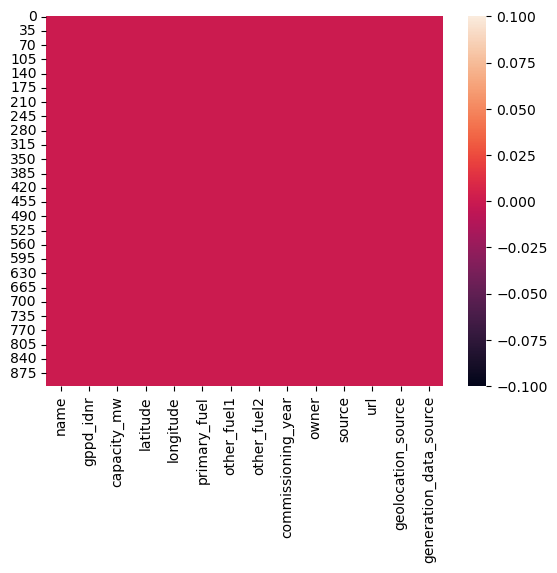

In [297]:
sns.heatmap(df.isnull())

In [298]:
dfcor=df.corr()
dfcor

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,url,geolocation_source,generation_data_source
name,1.000000,0.332205,0.060240,-0.135247,0.020279,0.040753,-0.035180,-0.045426,-0.043569,0.117954,-0.014640,0.041917,0.045882,-0.005862
gppd_idnr,0.332205,1.000000,-0.335742,-0.105728,-0.377812,0.609180,0.367177,0.001650,0.044059,-0.602038,0.416384,0.597080,-0.410443,0.734832
capacity_mw,0.060240,-0.335742,1.000000,0.050984,0.195882,-0.380395,-0.606289,0.003731,0.274292,0.304322,-0.242122,-0.243830,0.183419,-0.495833
latitude,-0.135247,-0.105728,0.050984,1.000000,0.036362,-0.010204,-0.032790,0.032885,0.102069,0.007221,0.055927,-0.131038,-0.178213,-0.086910
longitude,0.020279,-0.377812,0.195882,0.036362,1.000000,-0.347948,-0.275689,0.005545,0.092331,0.278443,-0.239333,-0.302985,0.244042,-0.409803
primary_fuel,0.040753,0.609180,-0.380395,-0.010204,-0.347948,1.000000,0.476410,0.032156,-0.126650,-0.260389,0.053613,0.589886,-0.420263,0.482339
other_fuel1,-0.035180,0.367177,-0.606289,-0.032790,-0.275689,0.476410,1.000000,0.215024,-0.322443,-0.324999,0.254138,0.269084,-0.182347,0.524183
other_fuel2,-0.045426,0.001650,0.003731,0.032885,0.005545,0.032156,0.215024,1.000000,-0.004875,-0.020804,0.016268,0.017225,-0.011672,0.033554
commissioning_year,-0.043569,0.044059,0.274292,0.102069,0.092331,-0.126650,-0.322443,-0.004875,1.000000,-0.021374,0.021528,0.010910,0.000606,-0.099520
owner,0.117954,-0.602038,0.304322,0.007221,0.278443,-0.260389,-0.324999,-0.020804,-0.021374,1.000000,-0.243587,-0.190672,0.398212,-0.620010


<AxesSubplot:>

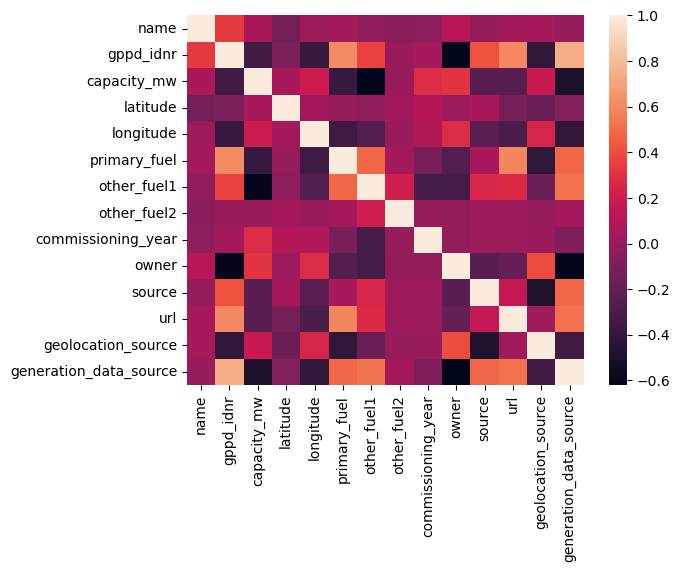

In [299]:
sns.heatmap(dfcor)

<AxesSubplot:>

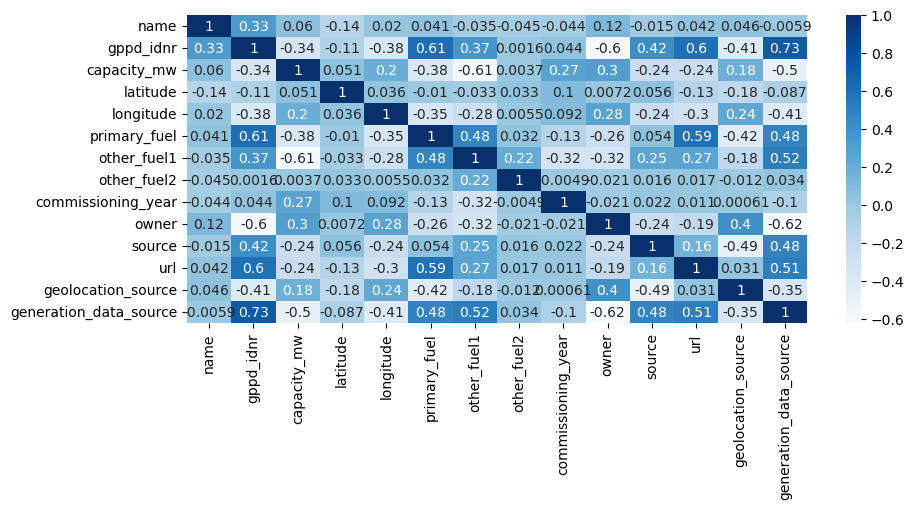

In [300]:
plt.figure(figsize=(10,4))
sns.heatmap(dfcor,cmap='Blues',annot=True)

<AxesSubplot:>

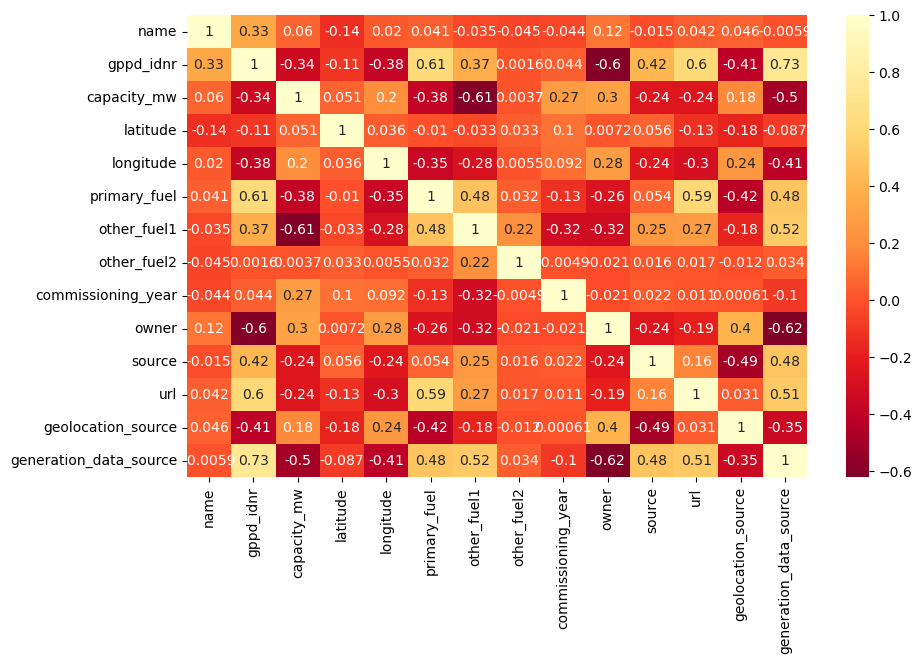

In [301]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True)

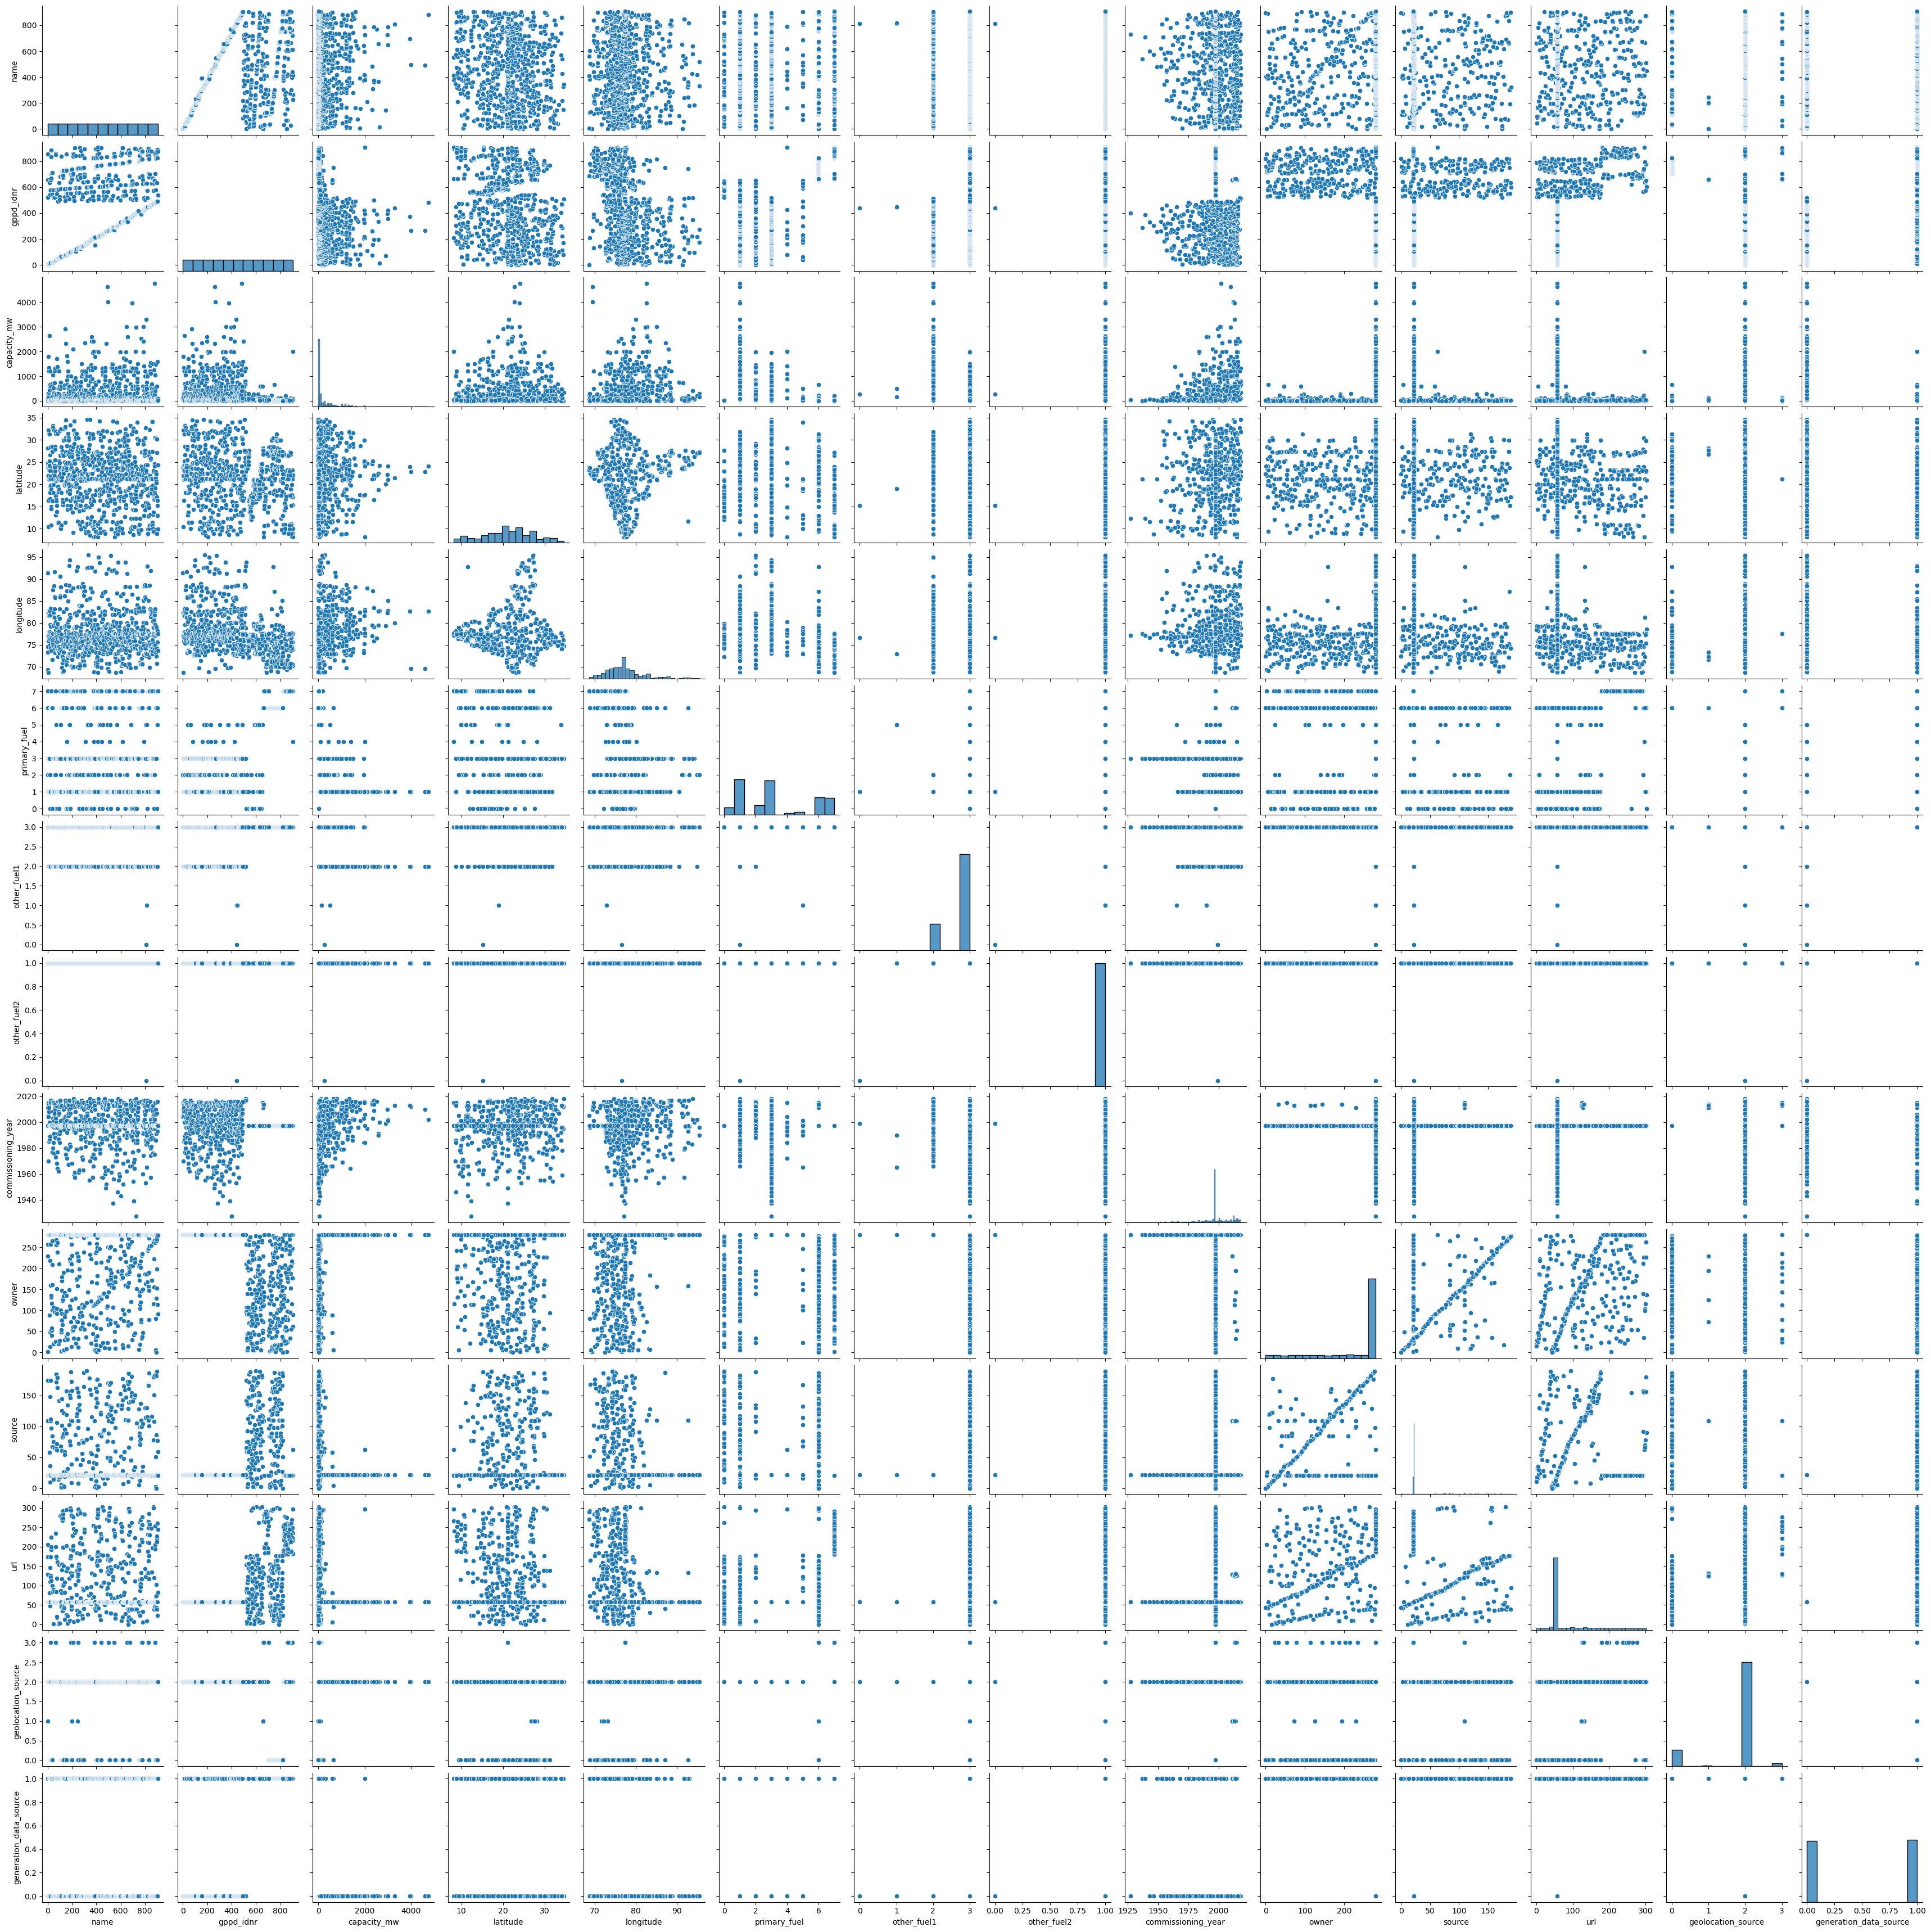

In [302]:
sns.pairplot(df)

<function matplotlib.pyplot.show(close=None, block=None)>

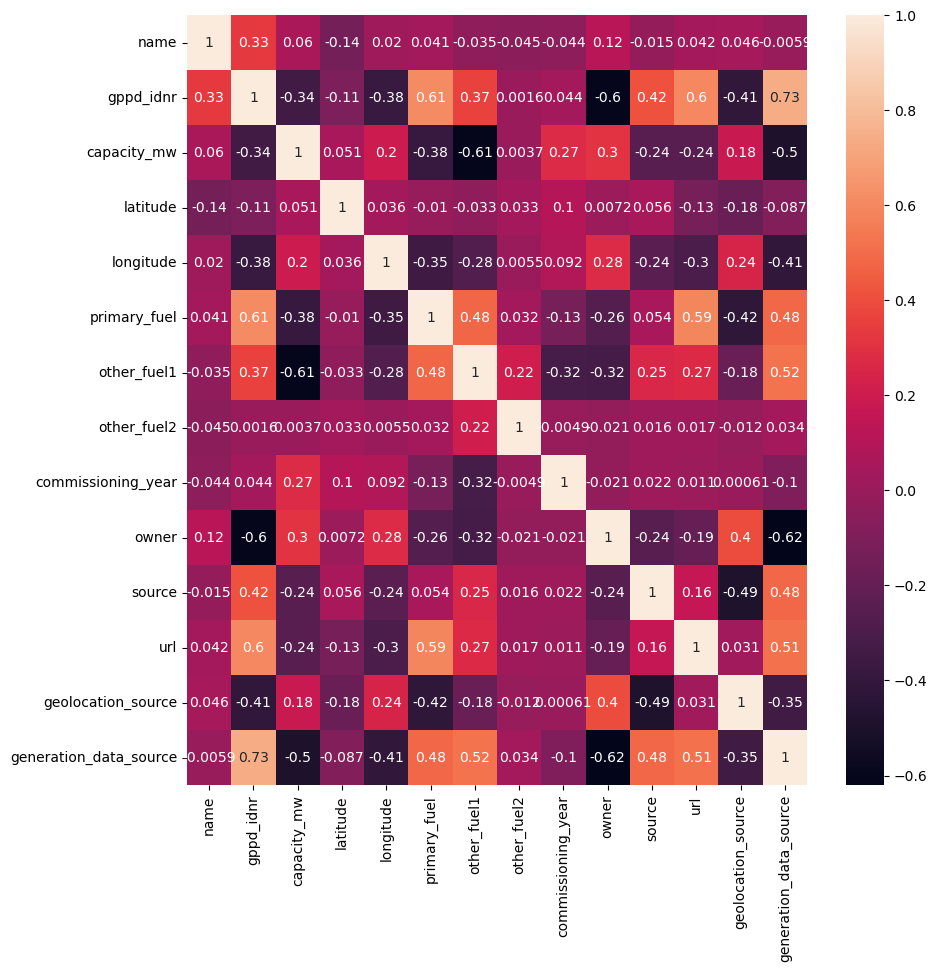

In [303]:
corr_hmap=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_hmap,annot=True)
plt.show

# primary fuel

In [304]:
A=df.iloc[:,:]
A

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,url,geolocation_source,generation_data_source
0,0,657,2.5,28.1839,73.2407,6,3,1,2011.000000,229,109,128,1,1
1,1,519,98.0,24.7663,74.6090,1,3,1,1997.091082,258,174,173,2,1
2,2,853,39.2,21.9038,69.3732,7,3,1,1997.091082,2,21,205,2,1
3,3,0,135.0,23.8712,91.3602,2,3,1,2004.000000,280,22,58,2,0
4,4,1,1800.0,21.9603,82.4091,1,2,1,2015.000000,280,22,58,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,902,491,1600.0,16.2949,77.3568,1,2,1,2016.000000,280,22,58,2,0
903,903,822,3.0,12.8932,78.1654,6,3,1,1997.091082,114,77,22,0,1
904,904,891,25.5,15.2758,75.5811,7,3,1,1997.091082,280,21,260,2,1
905,905,539,80.0,24.3500,73.7477,1,3,1,1997.091082,91,59,82,2,1


In [305]:
new_order=['name','gppd_idnr','capacity_mw','latitude','longitude','other_fuel1','other_fuel2','commissioning_year','owner','source','url','geolocation_source','generation_data_source','primary_fuel']

In [306]:
df=df[new_order]
df

,name,gppd_idnr,capacity_mw,latitude,longitude,other_fuel1,other_fuel2,commissioning_year,owner,source,url,geolocation_source,generation_data_source,primary_fuel
0,0,657,2.5,28.1839,73.2407,3,1,2011.000000,229,109,128,1,1,6
1,1,519,98.0,24.7663,74.6090,3,1,1997.091082,258,174,173,2,1,1
2,2,853,39.2,21.9038,69.3732,3,1,1997.091082,2,21,205,2,1,7
3,3,0,135.0,23.8712,91.3602,3,1,2004.000000,280,22,58,2,0,2
4,4,1,1800.0,21.9603,82.4091,2,1,2015.000000,280,22,58,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,902,491,1600.0,16.2949,77.3568,2,1,2016.000000,280,22,58,2,0,1
903,903,822,3.0,12.8932,78.1654,3,1,1997.091082,114,77,22,0,1,6
904,904,891,25.5,15.2758,75.5811,3,1,1997.091082,280,21,260,2,1,7
905,905,539,80.0,24.3500,73.7477,3,1,1997.091082,91,59,82,2,1,1


In [307]:
x=df.iloc[:,0:-1]
x

,name,gppd_idnr,capacity_mw,latitude,longitude,other_fuel1,other_fuel2,commissioning_year,owner,source,url,geolocation_source,generation_data_source
0,0,657,2.5,28.1839,73.2407,3,1,2011.000000,229,109,128,1,1
1,1,519,98.0,24.7663,74.6090,3,1,1997.091082,258,174,173,2,1
2,2,853,39.2,21.9038,69.3732,3,1,1997.091082,2,21,205,2,1
3,3,0,135.0,23.8712,91.3602,3,1,2004.000000,280,22,58,2,0
4,4,1,1800.0,21.9603,82.4091,2,1,2015.000000,280,22,58,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,902,491,1600.0,16.2949,77.3568,2,1,2016.000000,280,22,58,2,0
903,903,822,3.0,12.8932,78.1654,3,1,1997.091082,114,77,22,0,1
904,904,891,25.5,15.2758,75.5811,3,1,1997.091082,280,21,260,2,1
905,905,539,80.0,24.3500,73.7477,3,1,1997.091082,91,59,82,2,1


In [308]:
y=df.iloc[:,-1]
y

0      6
1      1
2      7
3      2
4      1
      ..
902    1
903    6
904    7
905    1
906    7
Name: primary_fuel, Length: 907, dtype: int32

In [309]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=43)

In [310]:
dtc=DecisionTreeClassifier()     
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.825
[[ 2  2  3  0  0  0  0  0]
 [ 5 50  1  1  0  1  0  0]
 [ 0  3 14  3  0  1  0  0]
 [ 0  0  1 41  6  3  0  0]
 [ 0  0  1  0  0  0  0  0]
 [ 0  1  1  2  0  1  0  0]
 [ 0  0  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0 30]]
              precision    recall  f1-score   support

           0       0.29      0.29      0.29         7
           1       0.89      0.86      0.88        58
           2       0.67      0.67      0.67        21
           3       0.87      0.80      0.84        51
           4       0.00      0.00      0.00         1
           5       0.17      0.20      0.18         5
           6       1.00      1.00      1.00        27
           7       1.00      1.00      1.00        30

    accuracy                           0.82       200
   macro avg       0.61      0.60      0.61       200
weighted avg       0.85      0.82      0.84       200



In [311]:
knn=KNeighborsClassifier()     
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=dtc.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.825
[[ 2  2  3  0  0  0  0  0]
 [ 5 50  1  1  0  1  0  0]
 [ 0  3 14  3  0  1  0  0]
 [ 0  0  1 41  6  3  0  0]
 [ 0  0  1  0  0  0  0  0]
 [ 0  1  1  2  0  1  0  0]
 [ 0  0  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0 30]]
              precision    recall  f1-score   support

           0       0.29      0.29      0.29         7
           1       0.89      0.86      0.88        58
           2       0.67      0.67      0.67        21
           3       0.87      0.80      0.84        51
           4       0.00      0.00      0.00         1
           5       0.17      0.20      0.18         5
           6       1.00      1.00      1.00        27
           7       1.00      1.00      1.00        30

    accuracy                           0.82       200
   macro avg       0.61      0.60      0.61       200
weighted avg       0.85      0.82      0.84       200



In [312]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
predmnb=mnb.predict(x_test)
print(accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))

0.45
[[ 6  0  0  0  0  0  0  1]
 [ 9 10  5  5 22  1  6  0]
 [ 1  3  5  4  3  4  0  1]
 [ 1  3  8 20  1 18  0  0]
 [ 0  0  1  0  0  0  0  0]
 [ 2  0  0  2  0  0  1  0]
 [ 7  0  0  0  0  0 19  1]
 [ 0  0  0  0  0  0  0 30]]
              precision    recall  f1-score   support

           0       0.23      0.86      0.36         7
           1       0.62      0.17      0.27        58
           2       0.26      0.24      0.25        21
           3       0.65      0.39      0.49        51
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         5
           6       0.73      0.70      0.72        27
           7       0.91      1.00      0.95        30

    accuracy                           0.45       200
   macro avg       0.43      0.42      0.38       200
weighted avg       0.62      0.45      0.48       200



In [313]:
svc=SVC(kernel='rbf')      # kernel='rdf'------>default
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.675
[[ 0  1  0  0  0  0  4  2]
 [ 0 35  0 10  0  0 13  0]
 [ 0  8  0 10  0  0  3  0]
 [ 0  5  0 46  0  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  0  0  2  0  0  3  0]
 [ 0  0  0  0  0  0 25  2]
 [ 0  0  0  0  0  0  1 29]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.71      0.60      0.65        58
           2       0.00      0.00      0.00        21
           3       0.67      0.90      0.77        51
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         5
           6       0.51      0.93      0.66        27
           7       0.88      0.97      0.92        30

    accuracy                           0.68       200
   macro avg       0.35      0.42      0.37       200
weighted avg       0.58      0.68      0.61       200



In [314]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.74
[[ 0  6  0  0  0  0  0  1]
 [ 0 46  0 10  0  0  2  0]
 [ 0 10  0 11  0  0  0  0]
 [ 0  5  0 46  0  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  3  0  2  0  0  0  0]
 [ 0  0  0  0  0  0 26  1]
 [ 0  0  0  0  0  0  0 30]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.66      0.79      0.72        58
           2       0.00      0.00      0.00        21
           3       0.66      0.90      0.76        51
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         5
           6       0.93      0.96      0.95        27
           7       0.94      1.00      0.97        30

    accuracy                           0.74       200
   macro avg       0.40      0.46      0.42       200
weighted avg       0.62      0.74      0.68       200



In [315]:
def dtc_f():
    dtc=DecisionTreeClassifier()     
    dtc.fit(x_train,y_train)
    dtc.score(x_train,y_train)
    preddtc=dtc.predict(x_test)
    print(accuracy_score(y_test,preddtc))
    print(confusion_matrix(y_test,preddtc))
    print(classification_report(y_test,preddtc))

In [316]:
dtc_f()

0.83
[[ 2  2  3  0  0  0  0  0]
 [ 5 49  3  0  0  1  0  0]
 [ 0  3 14  3  0  1  0  0]
 [ 0  0  0 43  6  2  0  0]
 [ 0  0  1  0  0  0  0  0]
 [ 0  1  1  2  0  1  0  0]
 [ 0  0  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0 30]]
              precision    recall  f1-score   support

           0       0.29      0.29      0.29         7
           1       0.89      0.84      0.87        58
           2       0.64      0.67      0.65        21
           3       0.90      0.84      0.87        51
           4       0.00      0.00      0.00         1
           5       0.20      0.20      0.20         5
           6       1.00      1.00      1.00        27
           7       1.00      1.00      1.00        30

    accuracy                           0.83       200
   macro avg       0.61      0.61      0.61       200
weighted avg       0.85      0.83      0.84       200



In [317]:
from sklearn.model_selection import cross_val_score


score=cross_val_score(mnb,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.53296703 0.52197802 0.4198895  0.37016575 0.39779006]
0.44855807176249163
0.06642288300204831


In [318]:
score=cross_val_score(svc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.74175824 0.69230769 0.78453039 0.74033149 0.70718232]
0.7332220265921924
0.03196250406674928


In [319]:
score=cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.7967033  0.86263736 0.90607735 0.82872928 0.89502762]
0.857834982696861
0.040787022736718706


In [320]:
score=cross_val_score(knn,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.68681319 0.6043956  0.68508287 0.6961326  0.68508287]
0.6715014267500454
0.033803098328539845


In [321]:
import numpy as np
s=np.array([902,491,1600.0,16.2949,77.3568,2,1,2016.000000,280,22,58,2,0])
s

array([9.02000e+02, 4.91000e+02, 1.60000e+03, 1.62949e+01, 7.73568e+01,
       2.00000e+00, 1.00000e+00, 2.01600e+03, 2.80000e+02, 2.20000e+01,
       5.80000e+01, 2.00000e+00, 0.00000e+00])

In [322]:
s.shape

(13,)

In [323]:
s=s.reshape(1,-1)

In [324]:
s.shape

(1, 13)

In [325]:
predvalue=dtc.predict(s)
predvalue

array([1])

In [326]:
def testpredict(s):
    s=s.reshape(1,-1)
    print("s.shape is",s.shape)
    predvalue=svc.predict(s)
    print(predvalue)
    

In [328]:
s=np.array([ 4,1,1800.0,21.9603,82.4091,2,1,2015.000000,280,22,58,2,0])
testpredict(s)

s.shape is (1, 13)
[1]


In [329]:
dft=pd.DataFrame(preddtc)
dft.to_csv('prediction_to.csv')

# capacity_mw

In [346]:
A=df.iloc[:,:]
A

,name,gppd_idnr,primary_fuel,latitude,longitude,other_fuel1,other_fuel2,commissioning_year,owner,source,url,geolocation_source,generation_data_source,capacity_mw
0,0,657,6,28.1839,73.2407,3,1,2011.000000,229,109,128,1,1,2.5
1,1,519,1,24.7663,74.6090,3,1,1997.091082,258,174,173,2,1,98.0
2,2,853,7,21.9038,69.3732,3,1,1997.091082,2,21,205,2,1,39.2
3,3,0,2,23.8712,91.3602,3,1,2004.000000,280,22,58,2,0,135.0
4,4,1,1,21.9603,82.4091,2,1,2015.000000,280,22,58,2,0,1800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,902,491,1,16.2949,77.3568,2,1,2016.000000,280,22,58,2,0,1600.0
903,903,822,6,12.8932,78.1654,3,1,1997.091082,114,77,22,0,1,3.0
904,904,891,7,15.2758,75.5811,3,1,1997.091082,280,21,260,2,1,25.5
905,905,539,1,24.3500,73.7477,3,1,1997.091082,91,59,82,2,1,80.0


In [347]:
new_orders=['name','gppd_idnr','primary_fuel','latitude','longitude','other_fuel1','other_fuel2','commissioning_year','owner','source','url','geolocation_source','generation_data_source','capacity_mw']

In [348]:
df=df[new_orders]
df

,name,gppd_idnr,primary_fuel,latitude,longitude,other_fuel1,other_fuel2,commissioning_year,owner,source,url,geolocation_source,generation_data_source,capacity_mw
0,0,657,6,28.1839,73.2407,3,1,2011.000000,229,109,128,1,1,2.5
1,1,519,1,24.7663,74.6090,3,1,1997.091082,258,174,173,2,1,98.0
2,2,853,7,21.9038,69.3732,3,1,1997.091082,2,21,205,2,1,39.2
3,3,0,2,23.8712,91.3602,3,1,2004.000000,280,22,58,2,0,135.0
4,4,1,1,21.9603,82.4091,2,1,2015.000000,280,22,58,2,0,1800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,902,491,1,16.2949,77.3568,2,1,2016.000000,280,22,58,2,0,1600.0
903,903,822,6,12.8932,78.1654,3,1,1997.091082,114,77,22,0,1,3.0
904,904,891,7,15.2758,75.5811,3,1,1997.091082,280,21,260,2,1,25.5
905,905,539,1,24.3500,73.7477,3,1,1997.091082,91,59,82,2,1,80.0


In [349]:
x=df.iloc[:,0:-1]
x

,name,gppd_idnr,primary_fuel,latitude,longitude,other_fuel1,other_fuel2,commissioning_year,owner,source,url,geolocation_source,generation_data_source
0,0,657,6,28.1839,73.2407,3,1,2011.000000,229,109,128,1,1
1,1,519,1,24.7663,74.6090,3,1,1997.091082,258,174,173,2,1
2,2,853,7,21.9038,69.3732,3,1,1997.091082,2,21,205,2,1
3,3,0,2,23.8712,91.3602,3,1,2004.000000,280,22,58,2,0
4,4,1,1,21.9603,82.4091,2,1,2015.000000,280,22,58,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,902,491,1,16.2949,77.3568,2,1,2016.000000,280,22,58,2,0
903,903,822,6,12.8932,78.1654,3,1,1997.091082,114,77,22,0,1
904,904,891,7,15.2758,75.5811,3,1,1997.091082,280,21,260,2,1
905,905,539,1,24.3500,73.7477,3,1,1997.091082,91,59,82,2,1


In [350]:
y=df.iloc[:,-1]
y

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
902    1600.0
903       3.0
904      25.5
905      80.0
906      16.5
Name: capacity_mw, Length: 907, dtype: float64

In [351]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [352]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=43)

In [353]:
lm = LinearRegression()
lm

LinearRegression()

In [354]:
lm.fit(x_train,y_train)

LinearRegression()

In [355]:
lm.coef_

array([ 1.29466233e-01,  1.09681124e-01, -3.73959368e+01,  1.65710177e+00,
       -7.47906699e+00, -5.69433034e+02, -7.67386155e-13,  4.66129306e+00,
        2.82484538e-01, -1.00207290e+00,  5.33516338e-01, -5.28414074e+01,
       -2.95793040e+02])

In [356]:
lm.intercept_

-6673.551638614718

In [357]:
lm.score(x_train,y_train)

0.427916824064249

In [358]:
pred=lm.predict(x_test)
print(pred)
print(y_test)

[-1.09300223e+01  2.49829680e+02  4.11533326e+02  3.01611079e+01
  1.46048739e+02  2.38247867e+01  9.72052639e+02  1.01409923e+03
  1.07686057e+03  9.88075292e+02  9.09742567e+01  1.11758693e+03
  1.24818896e+02  1.29240945e+02  3.86383702e+01 -3.86400846e+01
  1.09847893e+02  8.79260136e+02  1.04194222e+03  1.67573057e+02
  3.62040632e+01  3.16424094e+02  1.03215845e+03  2.32606649e+02
  4.34120014e+01 -5.33766289e+01  2.22959083e+02  4.55888517e+02
  5.03913496e+01  1.18743136e+01  5.76233681e+01  6.83242596e+01
  1.28777398e+02  2.87484304e+02 -8.57287990e+01  7.02957605e+00
  1.25191312e+02  1.27995230e+02  3.70118593e+02  2.06556618e+02
  1.10850225e+03  1.65481611e+01  1.55880796e+02 -3.64753610e+00
  3.72357963e+02  3.32005930e+02  1.50595855e+02 -3.57762775e+01
  1.07608633e+03  5.43600380e+00 -8.33634969e+00 -9.78826305e+01
  1.04820542e+03  9.28882148e+02  1.09971576e+03  3.54577012e+02
  9.05356484e+02  2.54910340e+02  3.54432547e+02  2.73244403e+02
  3.02900514e+01  8.16489

In [359]:
# y= a+bx+e (e=error,mse,mae,Rmse)
print('error:')
print('mean absolute error:',mean_absolute_error(y_test,pred))
print('mean squared error:',mean_squared_error(y_test,pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
mean absolute error: 232.3321368603941
mean squared error: 182614.42775130057
Root mean squared error: 427.3340938320983


In [360]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.4428994848620419


In [361]:
t=np.array([4,1,1800.0,21.9603,82.4091,2,1,2015.000000,280,22,58,2,0])

In [362]:
t.shape 

(13,)

In [363]:
t=t.reshape(1,-1)

In [364]:
t.shape

(1, 13)

In [365]:
lm.predict(t)

array([-66329.61244319])